### Atara Montaque's Findings 

**Introduction** 

I will examine speed humps installed by the City of Pittsburgh on neighborhood quality in 2021. Speed humps are crucial traffic calming measures that enhance safety and create pedestrian-friendly environments. The neighborhood that has the presence of more speed humps will be considered the best neighborhood in terms of safety.

**Metric**

The metric I will use to evaluate neighborhood quality is the number of speed humps installed per capita. My analysis will utilize the Speed Humps DataSet and Population Dataset.

In [12]:
# First import libraries I need
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
#Load the CSV file into a DataFrame
df = pd.read_csv('Speed_Humps.csv')

Here's a sample of the dataset

In [17]:
df.head(10)

_id          id  hump_id  locator_address_number locator_street  pavement  \
0    1   430808404        1                  4337.0      Saline St      9257   
1   34  1520886592        2                     NaN   Summerset Dr     15346   
2   67   858537521        3                   511.0       Gold Way      1755   
3   68   297775878        4                   547.0       Gold Way      1755   
4   69  1061197751        5                   593.0       Gold Way      1755   
5  100    25169591       10                  4224.0      Saline St      4673   
6  101  2056880845       11                  2146.0       Jacob St     17688   
7  102  1735565853       12                  2082.0       Jacob St     17688   
8  103   857069875       13                  2013.0       Jacob St     17688   
9  104  1822275525       14                  1937.0       Jacob St     17688   

  speed_hump_material         neighborhood  council_district  ward  \
0             Asphalt  Squirrel Hill South                 5    14   
1                 NaN  Squirrel Hill South                 5    14   
2             Asphalt        North Oakland                 6     5   
3             Asphalt        North Oakland                 6     5   
4             Asphalt        North Oakland                 6     5   
5             Asphalt  Squirrel Hill South                 5    15   
6             Asphalt            Brookline                 4    32   
7             Asphalt            Brookline                 4    32   
8             Asphalt            Brookline                 4    32   
9             Asphalt            Brookline                 4    32   

         tract  public_works_division  pli_division  police_zone fire_zone  \
0  42003141400                      3            14            4      2-15   
1  42003141400                      3            14            4      2-20   
2  42003562000                      3             5            4      2-23   
3  42003562000                      3             5            4      2-23   
4  42003562000                      3             5            4      2-23   
5  42003141400                      3            15            4      2-15   
6  42003320600                      5            32            6      4-25   
7  42003320600                      5            32            6      4-25   
8  42003320600                      5            32            6      4-25   
9  42003320600                      5            32            6      4-25   

    latitude  longitude  
0  40.419835 -79.926062  
1  40.425040 -79.912040  
2  40.456746 -79.954521  
3  40.457333 -79.954899  
4  40.458061 -79.955355  
5  40.422239 -79.926208  
6  40.391643 -79.999307  
7  40.392425 -79.999259  
8  40.393264 -79.999401  
9  40.394180 -79.999611

In [18]:
# Group the data by neighborhood and count the number of speed humps in each neighborhood
neighborhood_speed_humps = df.groupby('neighborhood')['hump_id'].count().reset_index()
neighborhood_speed_humps.columns = ['Neighborhood', 'Number_of_Speed_Humps']

print("\nNumber of Speed Humps in Each Neighborhood:")
print(neighborhood_speed_humps)


Number of Speed Humps in Each Neighborhood:
           Neighborhood  Number_of_Speed_Humps
0            Bloomfield                      3
1             Brookline                      4
2               Carrick                      9
3       Central Oakland                      1
4              Garfield                      3
5         Highland Park                      2
6        Homewood South                      4
7      Mount Washington                      3
8         North Oakland                      6
9             Overbrook                      1
10          Perry North                      4
11          Polish Hill                      6
12     South Side Flats                      3
13    South Side Slopes                      4
14  Squirrel Hill North                      3
15  Squirrel Hill South                     18
16      Stanton Heights                      1
17           Upper Hill                      4


---

Let's look at this information on a bar chart

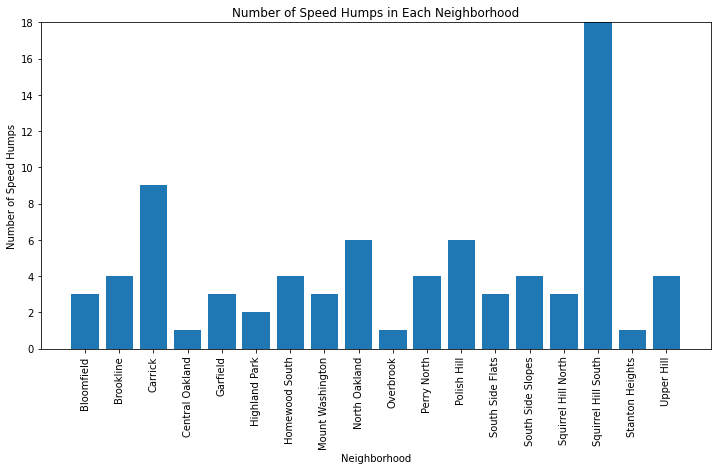

In [22]:
plt.figure(figsize=(12, 6))
plt.bar(neighborhood_speed_humps['Neighborhood'], neighborhood_speed_humps['Number_of_Speed_Humps'])
plt.xlabel('Neighborhood')
plt.ylabel('Number of Speed Humps')
plt.title('Number of Speed Humps in Each Neighborhood')
plt.ylim(0, 18)  # Set the y-axis limits
plt.xticks(rotation=90)
plt.show()

Let's rearrange this and visualize it in descending order  

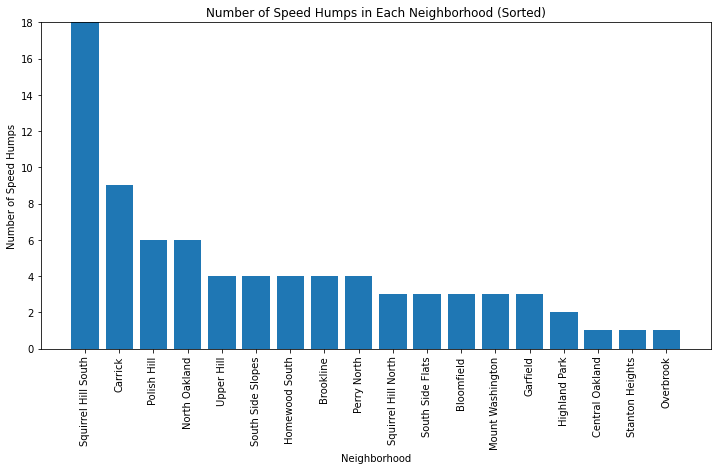

In [27]:
# Sort the data from highest to lowest number of speed humps
neighborhood_speed_humps_sorted = neighborhood_speed_humps.sort_values(by='Number_of_Speed_Humps', ascending=False)

# Visualize the sorted data
plt.figure(figsize=(12, 6))
plt.bar(neighborhood_speed_humps_sorted['Neighborhood'], neighborhood_speed_humps_sorted['Number_of_Speed_Humps'])
plt.xlabel('Neighborhood')
plt.ylabel('Number of Speed Humps')
plt.title('Number of Speed Humps in Each Neighborhood (Sorted)')
plt.ylim(0, 18) 
plt.xticks(rotation=90)
plt.show()

 It appears that Squirrel Hill South has the highest number of speed humps. However, to gain a more comprehensive understanding, we should consider the population of each neighborhood. Let's utilize the population dataset to determine the population of each neighborhood.

In [39]:
# Load Dataset and remove unnecessary columns
popData = pd.read_csv("PopulationData.csv", parse_dates=True)

newPopData = popData.drop(['_id','Id', 'Margin of Error; Total'], axis=1)
newPopData

Neighborhood  Estimate; Total
0      Allegheny Center           1411.0
1        Allegheny West            343.0
2             Allentown           2558.0
3             Arlington           1852.0
4     Arlington Heights            272.0
..                  ...              ...
86  Upper Lawrenceville           2754.0
87             West End            235.0
88         West Oakland           1717.0
89             Westwood           3537.0
90              Windgap           1534.0

[91 rows x 2 columns]

Let's just work with the neighborhoods from our earlier analysis

In [32]:
#filter the population data to get the neighborhood's from speed humps analysis
neighborhoods_of_interest = neighborhood_speed_humps['Neighborhood'].unique()

filtered_newPopData = newPopData[newPopData['Neighborhood'].isin(neighborhoods_of_interest)]

filtered_newPopData

Neighborhood  Estimate; Total
9            Bloomfield           8669.0
13            Brookline          13160.0
15              Carrick          10122.0
19      Central Oakland           5822.0
34             Garfield           3966.0
39        Highland Park           6810.0
41       Homewood South           2276.0
53     Mount Washington           8743.0
56        North Oakland           9602.0
60            Overbrook           3682.0
61          Perry North           3771.0
65          Polish Hill           1331.0
72     South Side Flats           6292.0
73    South Side Slopes           4583.0
76  Squirrel Hill North          11336.0
77  Squirrel Hill South          16042.0
79      Stanton Heights           4761.0
85           Upper Hill           1884.0

Great! Now that we've gathered data on neighborhood populations, let's find the average number of speed humps per person in each neighborhood. This will give us insight into which neighborhood prioritizes traffic safety the most relative to its population size.

In [41]:
# Merge the speed humps data with the population data
merged_data = pd.merge(neighborhood_speed_humps_sorted, newPopData, on='Neighborhood')

# Calculate average speed humps per capita
merged_data['Avg_Speed_Humps_Per_Capita'] = merged_data['Number_of_Speed_Humps'] / merged_data['Estimate; Total']

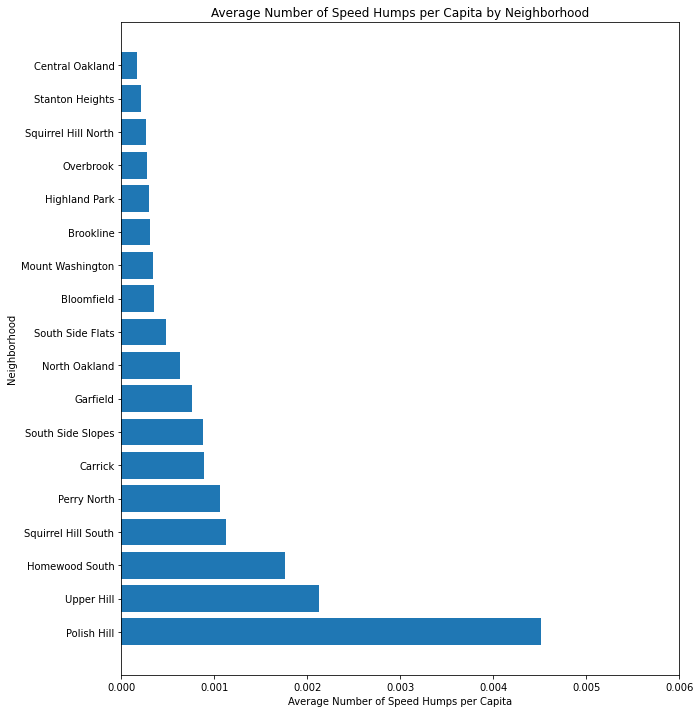

In [44]:
# Sort the data by the average speed humps per capita
merged_data_sorted = merged_data.sort_values(by='Avg_Speed_Humps_Per_Capita', ascending=False)

#Visualize
plt.figure(figsize=(10, 12))
plt.barh(merged_data_sorted['Neighborhood'], merged_data_sorted['Avg_Speed_Humps_Per_Capita'])
plt.xlabel('Average Number of Speed Humps per Capita')
plt.ylabel('Neighborhood')
plt.title('Average Number of Speed Humps per Capita by Neighborhood')
plt.xlim(right=0.006)  
plt.show()

Top 3 Safest neighborhoods: 
1. Polish Hill
2. Upper Hill
3. Homewood South

Polish Hill has the highest number of speed humps per capita, indicating a strong focus on pedestrian safety and potentially leading to lower levels of speeding vehicles, making it a safer place to live.